Точка номер 0
x = 0.0
Метод кон. разн. = -2.0
Сама ф. = -2.0
Погрешность = 0.0


Точка номер 1
x = 0.04
Метод кон. разн. = -1.829649891920846
Сама ф. = -1.76
Погрешность = 0.06964989192084592


Точка номер 2
x = 0.08
Метод кон. разн. = -1.71082156569116
Сама ф. = -1.637157287525381
Погрешность = 0.07366427816577903


Точка номер 3
x = 0.12
Метод кон. разн. = -1.6092041795189485
Сама ф. = -1.5335898384862245
Погрешность = 0.07561434103272391


Точка номер 4
x = 0.16
Метод кон. разн. = -1.5168600377700887
Сама ф. = -1.44
Погрешность = 0.07686003777008876


Точка номер 5
x = 0.2
Метод кон. разн. = -1.4305180289501902
Сама ф. = -1.352786404500042
Погрешность = 0.07773162445014825


Точка номер 6
x = 0.24
Метод кон. разн. = -1.34846400679919
Сама ф. = -1.2701020514433643
Погрешность = 0.07836195535582569


Точка номер 7
x = 0.28
Метод кон. разн. = -1.2696692252358637
Сама ф. = -1.1908497377870817
Погрешность = 0.07881948744878198


Точка номер 8
x = 0.32
Метод кон. разн. = -1.19345956433390

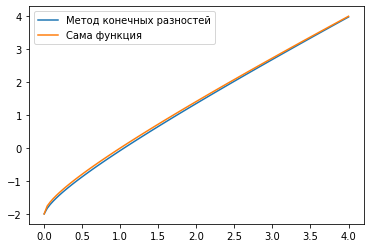

In [2]:
#    М30-221Б-18
#   Михаил Баландин

#    Вариант 9
#    Метод конечных разностей

#    Начальное уравнение
#   2x(x + 2)y'' + (2 - x)y' + 2y = 0

#   После преобразований
#   y'' + (2 - x) / 2x(x + 2) * y' + 1 / 2x(x + 2)*y = 0

#   Точное решение
#   y(x) = |x|**(1/2) + x - 2


import numpy as np
from matplotlib import pyplot as plt


def true_func(x):
    return abs(x)**(1/2) + x - 2


def gaussian_elimination(A, b=None):

    dimensions = A.shape

    if b is not None:
        A = np.hstack((A, b))

    # сделать все, что ниже главной диагонали равным нулю
    for j in range(0, dimensions[0] - 1):
        for i in range(j + 1, A.shape[0]):
            coef = A[i, j] / A[j, j]
            A[i, :] -= coef * A[j, :]

    # сделать все, что выше главной диагонали равным нулю
    for j in range(dimensions[0]-1, 0, -1):
        for i in range(j-1, -1, -1):
            coef = A[i, j] / A[j, j]
            A[i, :] -= coef * A[j, :]

    answers = []
    for i in range(dimensions[0]):
        answers.append(A[i, -1] / A[i, i])

    return answers


def p(x):
    return (2 - x) / (2 * x * (x + 2))


def q(x):
    return 1 / (2 * x * (x + 2))


def f(x):
    return 0


def get_step(interval_start, interval_end, how_many_points):
    step = abs(interval_end - interval_start) / (how_many_points + 1)
    return step


def get_coeffs(step, p, q, f, x):
    coeffs = [1 - p(x) * step / 2, (-2 + step**2*q(x)), (1 + p(x) * step / 2)]
    right_part = step**2 * f(x)
    return coeffs, right_part


def get_system(left_y, right_cond, how_many_points, interval_start, interval_end):
    step = get_step(interval_start, interval_end, how_many_points)
    first_equ = np.zeros((1, how_many_points+3))
    first_equ[0, 0] = 1
    first_equ[0, -1] = left_y

    system = first_equ

    for i in range(how_many_points):
        equ = np.zeros((1, how_many_points+3))
        x = interval_start + step * (i + 1)
        coeffs, right_part = get_coeffs(step, p, q, f, x)
        for j in range(3):
            equ[0, i+j] = coeffs[j]
        equ[0, -1] = right_part

        system = np.vstack((system, equ))

    last_equ = np.zeros((1, how_many_points+3))

    last_equ[0, -1] = right_cond
    last_equ[0, -2] = 1/step + 1
    last_equ[0, -3] = -1/step

    system = np.vstack((system, last_equ))

    return system


left_side_cond = -2
right_side_cond = 21 / 4
how_many_points = 99  # кол-во точек, выбрано чтобы получить более гладкий график
start_at = 0
finish_at = 4


system = get_system(left_side_cond, right_side_cond, how_many_points, start_at, finish_at)
answers = gaussian_elimination(system)

# +2 потому что отображается значение функции в конце и начале промежутка
xs = [start_at + i*get_step(start_at, finish_at, how_many_points) for i in range(how_many_points+2)]
true_ys = [true_func(x) for x in xs]
plt.plot(xs, answers, label='Метод конечныx разностей')
plt.plot(xs, true_ys, label='Сама функция')
plt.legend()


for i, vals in enumerate(zip(xs, answers, true_ys)):
    x, fin_diff_y, true_y = vals
    print(f'Точка номер {i}')
    print(f'x = {x}')
    print(f'Метод кон. разн. = {fin_diff_y}')
    print(f'Сама ф. = {true_y}')
    print(f'Погрешность = {abs(true_y - fin_diff_y)}')

    print('\n')

plt.show()
